In [119]:
import numpy as np
import pandas as pd

train = pd.read_csv("./train.csv")
train_x = train.drop(['target'], axis=1)
train_y = train['target']

train_x_copy = train_x.copy()

print(train_x.info(memory_usage='deep'))
print(train_y.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   sex                 10000 non-null  int64  
 2   height              10000 non-null  float64
 3   weight              10000 non-null  float64
 4   product             10000 non-null  int64  
 5   amount              10000 non-null  int64  
 6   medical_info_a1     10000 non-null  int64  
 7   medical_info_a2     10000 non-null  int64  
 8   medical_info_a3     10000 non-null  int64  
 9   medical_info_b1     10000 non-null  int64  
 10  medical_info_b2     10000 non-null  int64  
 11  medical_info_b3     10000 non-null  int64  
 12  medical_info_c1     7030 non-null   float64
 13  medical_info_c2     1998 non-null   float64
 14  medical_keyword_1   10000 non-null  int64  
 15  medical_keyword_2   10000 non-null  int64  
 16  medic

In [120]:
from functools import reduce
import math

def load_data(data):
    return data.copy()

def standardScaler(data):
    for column in data:
        mean = data[column].sum() / len(data[column])
        std = math.sqrt(reduce(lambda acc, cur: acc+cur, [(x-mean)**2 for x in data[column]]) / len(data[column]))
        data[column] = [(x-mean)/std for x in data[column]]
    return data

def minMaxScaler(data):
    for column in data:
        min = data[column].min()
        max = data[column].max()
        data[column] = [(x-min) / (max-min) for x in data[column]]
    return data

def getStandardScalerData(data):
    return standardScaler(load_data(data))

def getMinMaxScalerData(data):
    return minMaxScaler(load_data(data))

def plot_diff(origin, transform, column):
    plt.subplot(1,2,1)
    plt.hist(origin[column], color='orchid', label='Origin')
    plt.legend(loc='upper right')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.subplot(1,2,2)
    plt.hist(transform[column], color='crimson', label='Transform')
    plt.legend(loc='upper right')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.show()


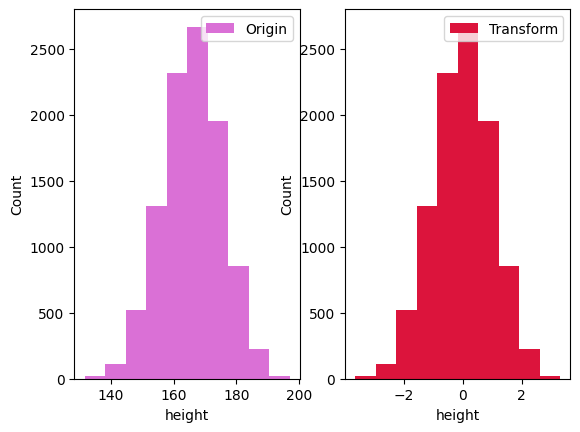

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

cols = ['age', 'height', 'weight']
train_x[cols] = getStandardScalerData(train_x_copy[cols])
train_x[cols].describe()
plot_diff(train_x_copy, train_x, 'height')


In [122]:
print(train_x_copy[cols].describe())
print(train_x[cols].describe())

                age        height        weight
count  10000.000000  10000.000000  10000.000000
mean      42.026500    165.892951     60.857049
std       21.676005      9.408643     10.718324
min        5.000000    131.619709     28.282276
25%       23.000000    159.549826     53.363119
50%       43.000000    166.084344     60.520498
75%       61.000000    172.422230     67.812917
max       79.000000    197.007690    113.917920
                age        height        weight
count  1.000000e+04  1.000000e+04  1.000000e+04
mean   6.252776e-17 -2.836842e-15 -2.302158e-16
std    1.000050e+00  1.000050e+00  1.000050e+00
min   -1.708265e+00 -3.642923e+00 -3.039319e+00
25%   -8.778117e-01 -6.742144e-01 -6.992050e-01
50%    4.491366e-02  2.034330e-02 -3.140125e-02
75%    8.753665e-01  6.940008e-01  6.490022e-01
max    1.705819e+00  3.307203e+00  4.950729e+00


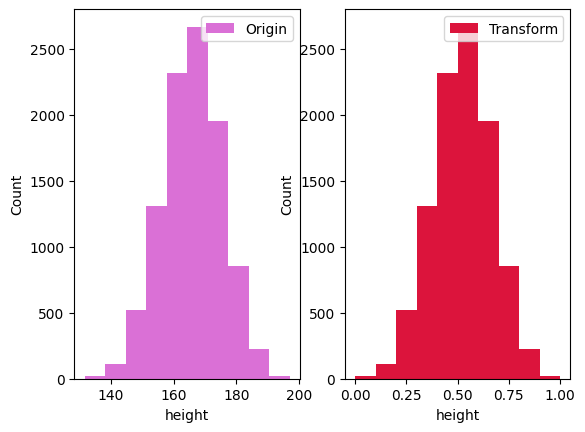

In [123]:
# Min-Max 
import matplotlib.pyplot as plt
%matplotlib inline

cols = ['age', 'height', 'weight']
train_x = getMinMaxScalerData(train_x_copy)
train_x[cols].describe()
plot_diff(train_x_copy, train_x, 'height')


In [124]:
print(train_x_copy[cols].describe())
print(train_x[cols].describe())

                age        height        weight
count  10000.000000  10000.000000  10000.000000
mean      42.026500    165.892951     60.857049
std       21.676005      9.408643     10.718324
min        5.000000    131.619709     28.282276
25%       23.000000    159.549826     53.363119
50%       43.000000    166.084344     60.520498
75%       61.000000    172.422230     67.812917
max       79.000000    197.007690    113.917920
                age        height        weight
count  10000.000000  10000.000000  10000.000000
mean       0.500358      0.524152      0.380388
std        0.292919      0.143889      0.125162
min        0.000000      0.000000      0.000000
25%        0.243243      0.427145      0.292879
50%        0.513514      0.527079      0.376458
75%        0.756757      0.624006      0.461614
max        1.000000      1.000000      1.000000
